In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('direct_marketing_dataset.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

# Investigate Distribution

<Axes: xlabel='y'>

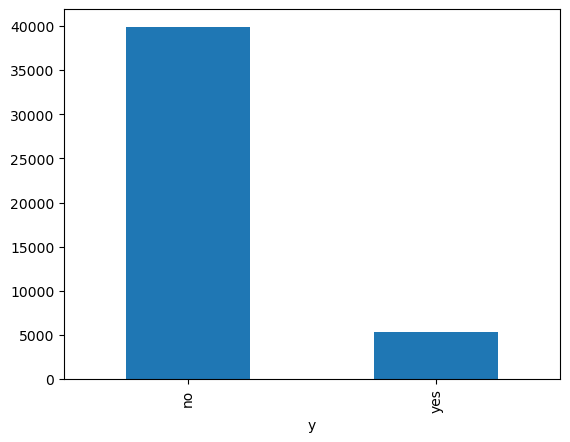

In [7]:
vc = df['y'].value_counts()
vc.plot(kind='bar')

In [8]:
df.drop('duration', axis=1, inplace=True)

# Encoding for numerical values

In [9]:
le = preprocessing.LabelEncoder()
le.fit(df['housing'])
df['housing'] = le.transform(df.housing)

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df['loan'])
df['loan'] = le.transform(df.loan)

In [11]:
le = preprocessing.LabelEncoder()
le.fit(df['default'])
df['default'] = le.transform(df.default)

In [12]:
enc = OrdinalEncoder(categories = [['single', 'married', 'divorced']])
df['marital'] = enc.fit_transform(df['marital'].values.reshape(-1, 1))

In [13]:
enc = OrdinalEncoder(categories = [['unknown', 'primary', 'secondary', 'tertiary']])
df['education'] = enc.fit_transform(df['education'].values.reshape(-1, 1))

In [14]:
le = preprocessing.LabelEncoder()
le.fit(df['y'])
df['y'] = le.transform(df.y)

In [15]:
df = pd.get_dummies(df, columns=['job', 'contact', 'month', 'poutcome'], dtype='int')

In [16]:
df.head(5)

,age,marital,education,default,balance,housing,loan,day,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1.0,3.0,0,2143,1,0,5,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,44,0.0,2.0,0,29,1,0,5,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,33,1.0,2.0,0,2,1,1,5,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,47,1.0,0.0,0,1506,1,0,5,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,33,0.0,0.0,0,1,0,0,5,1,-1,...,0,0,1,0,0,0,0,0,0,1


In [17]:
df.to_csv('df.csv')

# Create test and train datasets

In [18]:
X = df.drop('y', axis=1)
y = df['y']

In [19]:
y = pd.DataFrame(y).reset_index(drop=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model - 1

In [21]:
X_train = pd.DataFrame(X_train).reset_index(drop=True)
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test2], axis=1)
# Model Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [22]:
# Generate predicions
y_pred=model.predict(X_test)

# Generate confusion matrix as a dataframe
conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']
# Create a DataFrame from Confusion Matrix
conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [23]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8904124737365918
Precision: 0.6785714285714286
Recall: 0.17415215398716774
Confusion Matrix:
      0    1
0  7862   90
1   901  190


In [24]:
most_informative_features = pd.DataFrame([model.feature_importances_], columns=X_train.columns)

In [25]:
most_informative_features.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Plot confusion matrix - 1

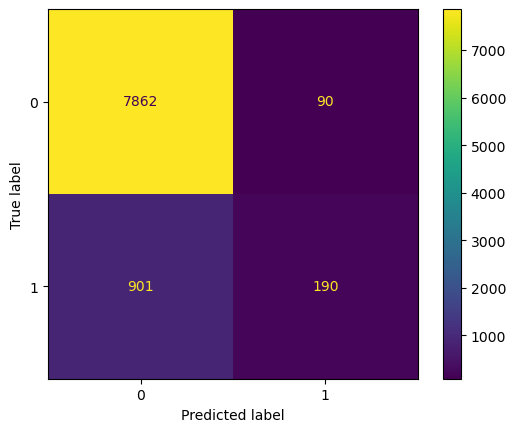

In [26]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

In [27]:
# If you have y_test and predictionsdt from your model's prediction

cm = confusion_matrix(y_test, y_pred)
 
# Convert the confusion matrix into a DataFrame

cm_df = pd.DataFrame(cm, 

                     index=['0', '1'], 

                     columns=['0', '1'])
 
# Show the confusion matrix DataFrame

print(cm_df)
 

      0    1
0  7862   90
1   901  190


# Plot decision tree - 1

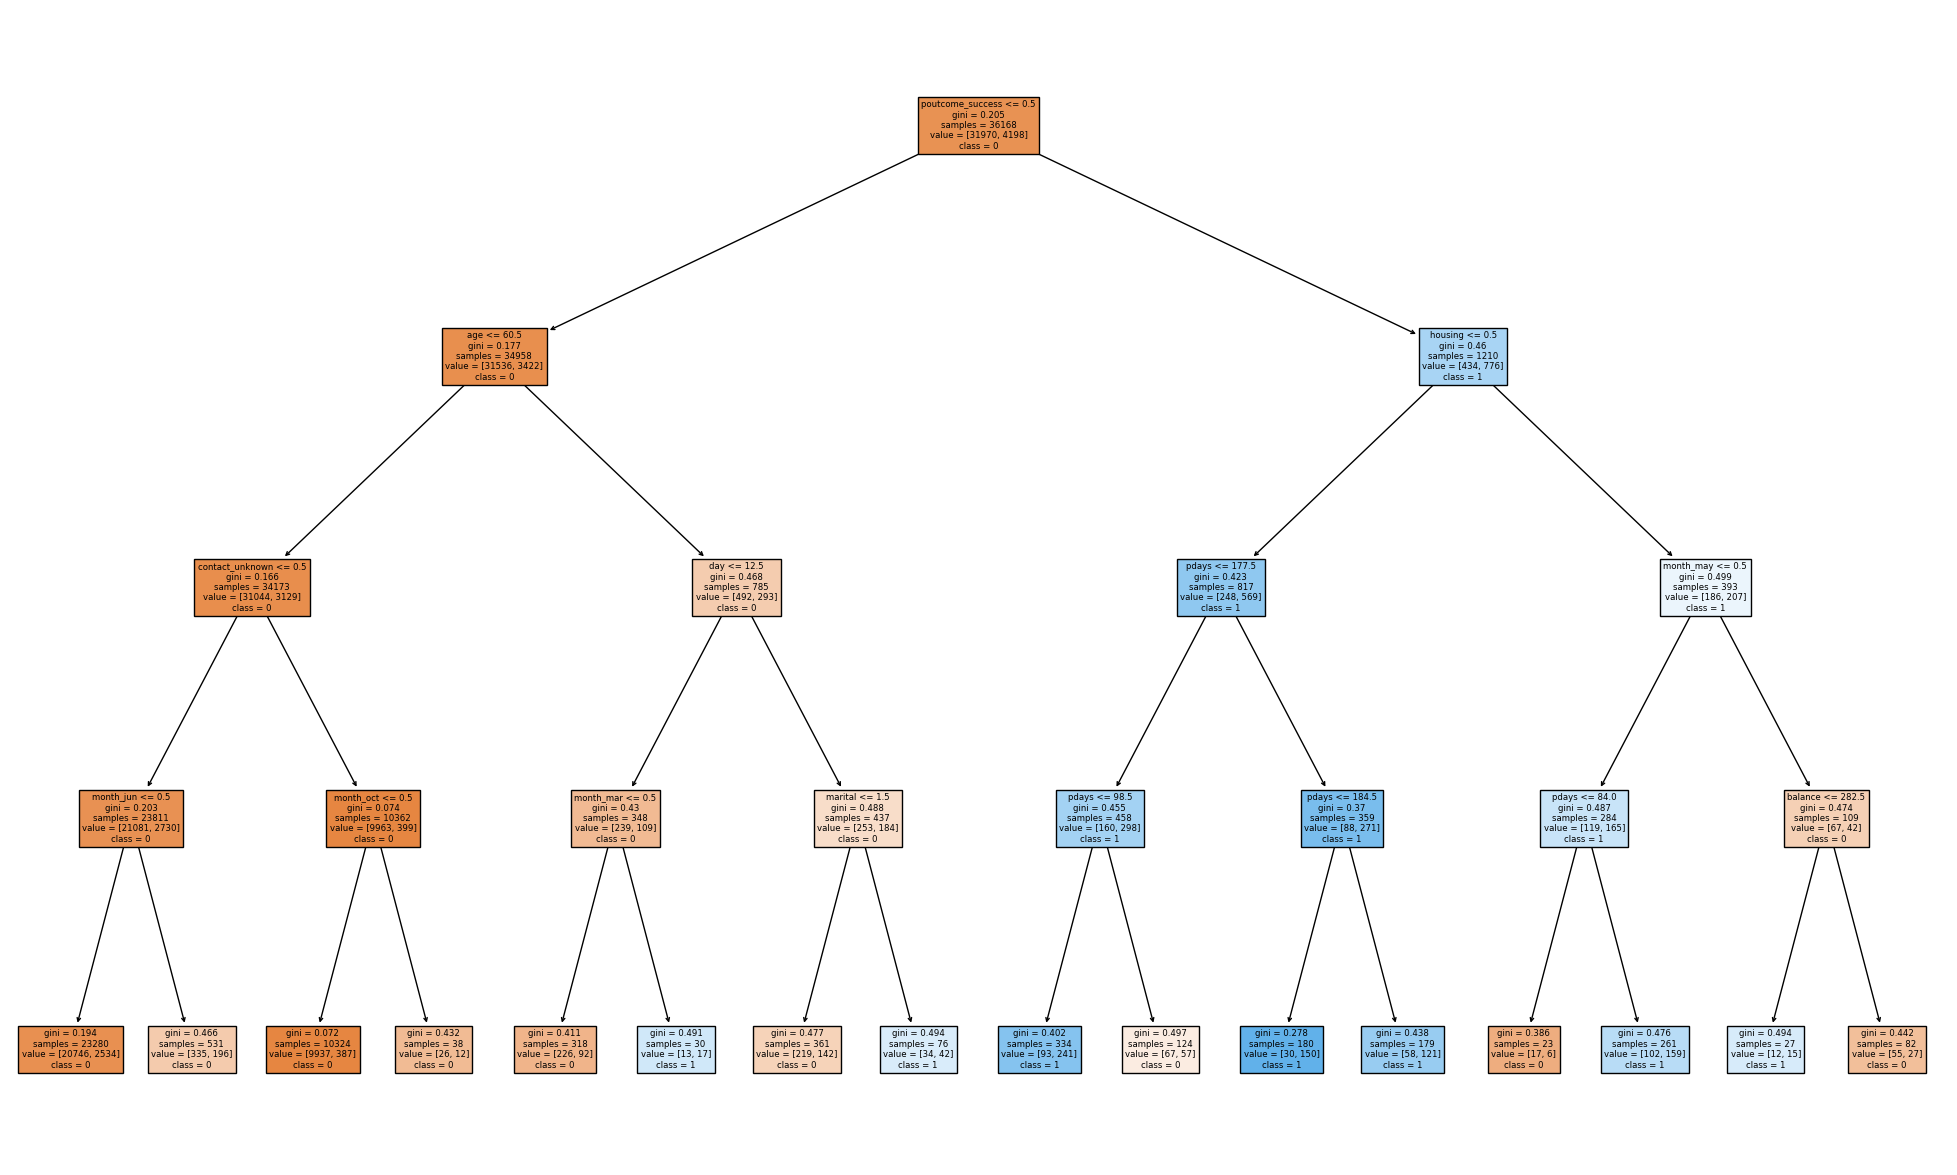

In [28]:
fig = plt.figure(figsize=(25, 15))
subs = tree.plot_tree(model,
                      feature_names = X_train.columns,
                      class_names = ['0', '1'],
                      filled = True
                     )

# Plot ROC curve - 1

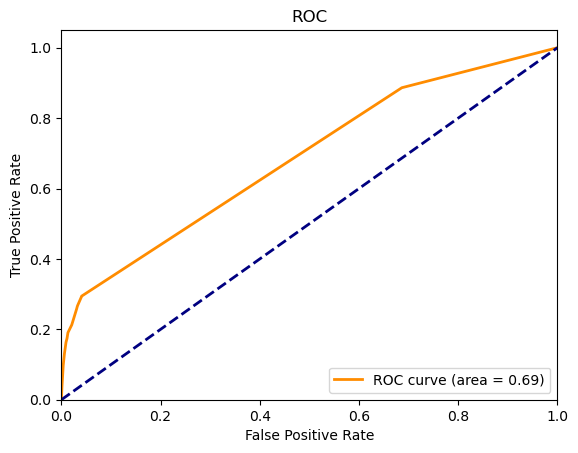

In [29]:
# Ensure your model can provide probability estimates
# This is done by using the predict_proba method rather than predict
# Note: For decision trees and many other models, this is applicable.
y_scores = model.predict_proba(X_test)[:, 1]  # get the probability of the positive class
 
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Classification Report - 1

In [30]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.68      0.17      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [31]:
classification = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification = pd.DataFrame.from_dict(classification)
classification

,0,1,accuracy,macro avg,weighted avg
precision,0.897181,0.678571,0.890412,0.787876,0.870807
recall,0.988682,0.174152,0.890412,0.581417,0.890412
f1-score,0.940712,0.277170,0.890412,0.608941,0.860658
support,7952.000000,1091.000000,0.890412,9043.000000,9043.000000


# Oversampling - SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
unique, count = np.unique(y_train, return_counts=True)
y_train_value_count = {k:v for (k, v) in zip (unique, count)}
y_train_value_count

{0: 31970, 1: 4198}

In [34]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [35]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote = {k:v for (k, v) in zip (unique, count)}
y_train_smote

{0: 31970, 1: 31970}

In [36]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train_res, y_train_res)

y_pred=model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()


In [37]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.802056839544399
Precision: 0.3067993366500829
Recall: 0.5087076076993584
Confusion Matrix:
      0     1
0  6698  1254
1   536   555


In [38]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7952
           1       0.31      0.51      0.38      1091

    accuracy                           0.80      9043
   macro avg       0.62      0.68      0.63      9043
weighted avg       0.85      0.80      0.82      9043



In [39]:
classification_sm = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_sm = pd.DataFrame.from_dict(classification_sm)
classification_sm

,0,1,accuracy,macro avg,weighted avg
precision,0.925905,0.306799,0.802057,0.616352,0.851213
recall,0.842304,0.508708,0.802057,0.675506,0.802057
f1-score,0.882128,0.382759,0.802057,0.632443,0.821881
support,7952.000000,1091.000000,0.802057,9043.000000,9043.000000


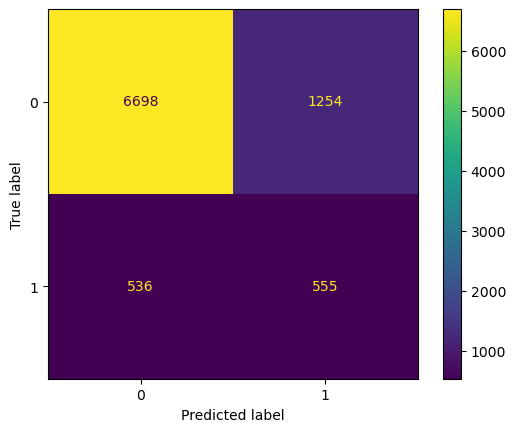

In [40]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

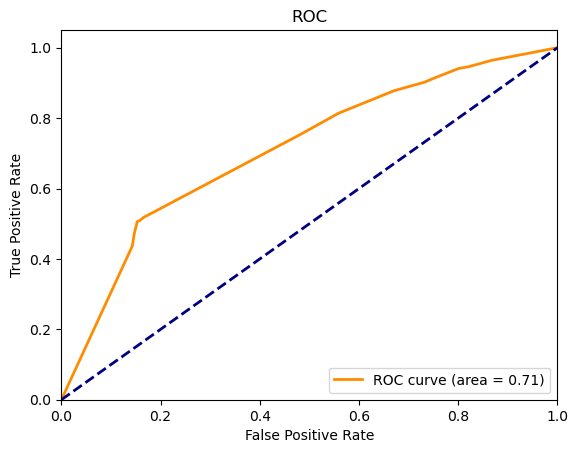

In [41]:
y_scores = model.predict_proba(X_test)[:, 1]  # get the probability of the positive class
 
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [42]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train_res, y_train_res)

y_pred=model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.6545394227579343
Precision: 0.19428571428571428
Recall: 0.5921173235563703
Confusion Matrix:
      0     1
0  5273  2679
1   445   646


In [43]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      7952
           1       0.19      0.59      0.29      1091

    accuracy                           0.65      9043
   macro avg       0.56      0.63      0.53      9043
weighted avg       0.83      0.65      0.71      9043



In [44]:
classification_sm2 = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_sm2 = pd.DataFrame.from_dict(classification_sm2)
classification_sm2

,0,1,accuracy,macro avg,weighted avg
precision,0.922176,0.194286,0.654539,0.558231,0.834359
recall,0.663104,0.592117,0.654539,0.627610,0.654539
f1-score,0.771470,0.292572,0.654539,0.532021,0.713693
support,7952.000000,1091.000000,0.654539,9043.000000,9043.000000


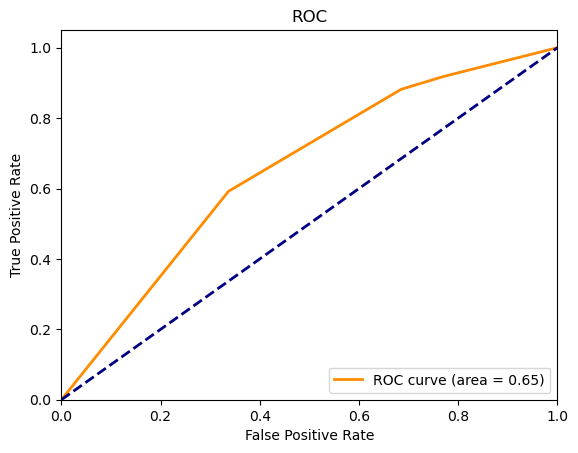

In [45]:
y_scores = model.predict_proba(X_test)[:, 1]  # get the probability of the positive class
 
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Oversampling - Random Oversampling

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
ros = RandomOverSampler(random_state=42)
X_train_rs, y_train_rs = ros.fit_resample(X_train, y_train)

In [48]:
unique, count = np.unique(y_train_rs, return_counts=True)
yts = {k:v for (k, v) in zip (unique, count)}
yts

{0: 31970, 1: 31970}

In [49]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train_rs, y_train_rs)

y_pred=model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [50]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7475395333407056
Precision: 0.25573770491803277
Recall: 0.5719523373052245
Confusion Matrix:
      0     1
0  6136  1816
1   467   624


In [51]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      7952
           1       0.26      0.57      0.35      1091

    accuracy                           0.75      9043
   macro avg       0.59      0.67      0.60      9043
weighted avg       0.85      0.75      0.78      9043



In [52]:
classification_ro = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_ro = pd.DataFrame.from_dict(classification_ro)
classification_ro

,0,1,accuracy,macro avg,weighted avg
precision,0.929275,0.255738,0.74754,0.592506,0.848015
recall,0.771630,0.571952,0.74754,0.671791,0.747540
f1-score,0.843147,0.353441,0.74754,0.598294,0.784066
support,7952.000000,1091.000000,0.74754,9043.000000,9043.000000


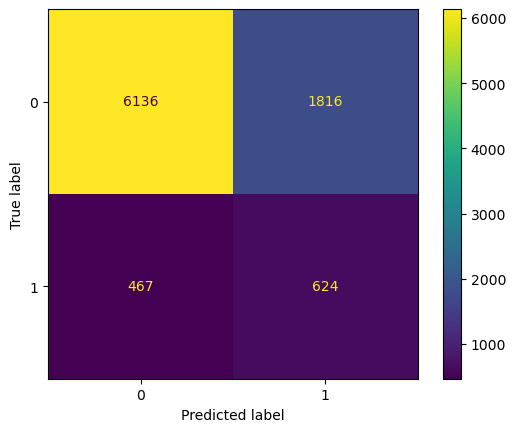

In [53]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

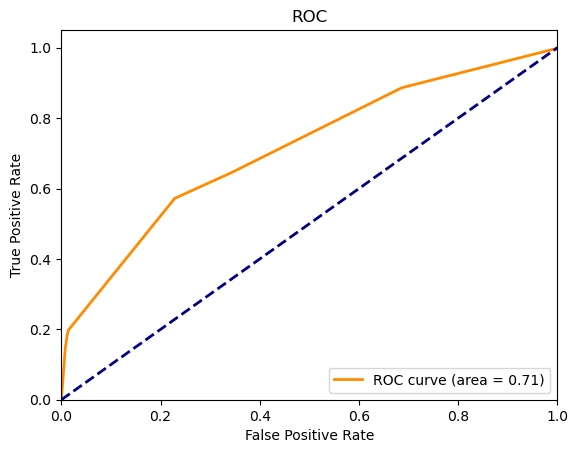

In [54]:
y_scores = model.predict_proba(X_test)[:, 1] 
 
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Oversampling - ADASYN

In [55]:
from imblearn.over_sampling import ADASYN

In [56]:
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [57]:
unique, count = np.unique(y_train_rs, return_counts=True)
yts = {k:v for (k, v) in zip (unique, count)}
yts

{0: 31970, 1: 31970}

In [58]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train_ada, y_train_ada)

y_pred=model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [59]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8036049983412584
Precision: 0.2986478542034098
Recall: 0.46562786434463793
Confusion Matrix:
      0     1
0  6759  1193
1   583   508


In [60]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7952
           1       0.30      0.47      0.36      1091

    accuracy                           0.80      9043
   macro avg       0.61      0.66      0.62      9043
weighted avg       0.85      0.80      0.82      9043



In [61]:
classification_ada = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_ada = pd.DataFrame.from_dict(classification_sm)
classification_ada

,0,1,accuracy,macro avg,weighted avg
precision,0.925905,0.306799,0.802057,0.616352,0.851213
recall,0.842304,0.508708,0.802057,0.675506,0.802057
f1-score,0.882128,0.382759,0.802057,0.632443,0.821881
support,7952.000000,1091.000000,0.802057,9043.000000,9043.000000


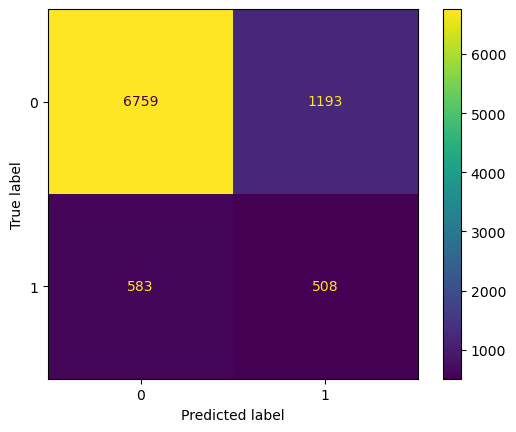

In [62]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

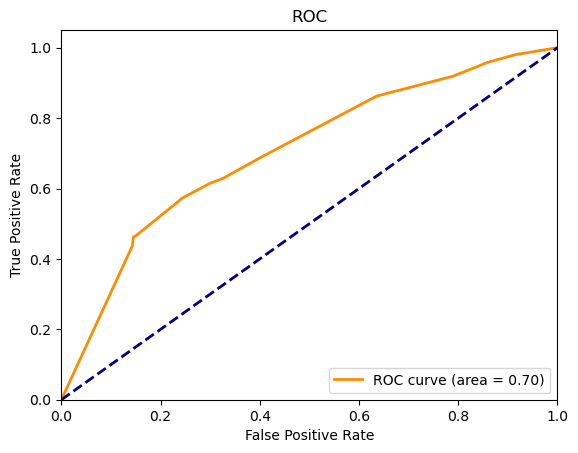

In [63]:
y_scores = model.predict_proba(X_test)[:, 1] 
 
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Oversampling - BorderlineSMOTE

In [64]:
from imblearn.over_sampling import BorderlineSMOTE

In [65]:
bls = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)

In [66]:
unique, count = np.unique(y_resampled, return_counts=True)
yt_bls = {k:v for (k, v) in zip (unique, count)}
yt_bls

{0: 31970, 1: 31970}

In [67]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_resampled, y_resampled)

y_pred=model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [68]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8013933429171735
Precision: 0.29659549913444894
Recall: 0.4711274060494959
Confusion Matrix:
      0     1
0  6733  1219
1   577   514


In [69]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7952
           1       0.30      0.47      0.36      1091

    accuracy                           0.80      9043
   macro avg       0.61      0.66      0.62      9043
weighted avg       0.85      0.80      0.82      9043



In [70]:
classification_bsm = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_bsm = pd.DataFrame.from_dict(classification_bsm)
classification_bsm

,0,1,accuracy,macro avg,weighted avg
precision,0.921067,0.296595,0.801393,0.608831,0.845727
recall,0.846705,0.471127,0.801393,0.658916,0.801393
f1-score,0.882322,0.364023,0.801393,0.623172,0.819791
support,7952.000000,1091.000000,0.801393,9043.000000,9043.000000


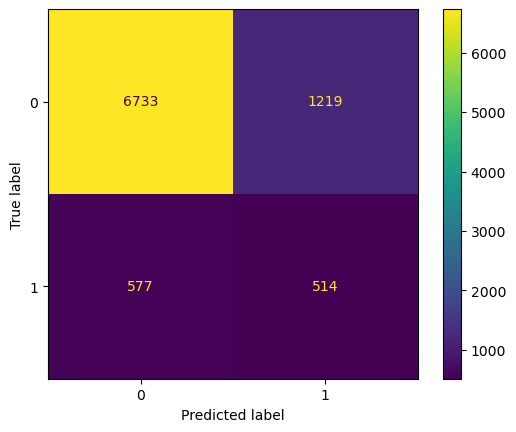

In [71]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

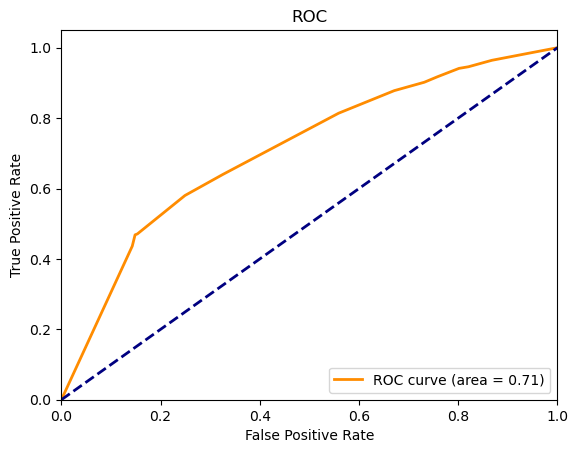

In [72]:
y_scores = model.predict_proba(X_test)[:, 1] 
 
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Combination - SMOTEENN

In [73]:
from imblearn.combine import SMOTEENN

In [74]:
smote_enn = SMOTEENN(random_state=42)
X_senn, y_senn = smote_enn.fit_resample(X_train, y_train)

In [75]:
unique, count = np.unique(y_senn, return_counts=True)
y_senn_1 = {k:v for (k, v) in zip (unique, count)}
y_senn_1

{0: 17593, 1: 26676}

In [76]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_senn, y_senn)

y_pred=model.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [78]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7877916620590512
Precision: 0.28210526315789475
Recall: 0.4912923923006416
Confusion Matrix:
      0     1
0  6588  1364
1   555   536


In [79]:
print(classification_report(y_test,
                            y_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7952
           1       0.28      0.49      0.36      1091

    accuracy                           0.79      9043
   macro avg       0.60      0.66      0.62      9043
weighted avg       0.85      0.79      0.81      9043



In [80]:
classification_enn = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_enn = pd.DataFrame.from_dict(classification_enn)
classification_enn

,0,1,accuracy,macro avg,weighted avg
precision,0.922302,0.282105,0.787792,0.602203,0.845065
recall,0.828471,0.491292,0.787792,0.659882,0.787792
f1-score,0.872872,0.358409,0.787792,0.615640,0.810804
support,7952.000000,1091.000000,0.787792,9043.000000,9043.000000


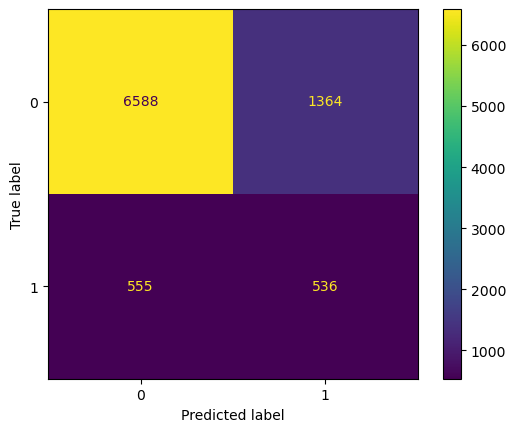

In [81]:
cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=model.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

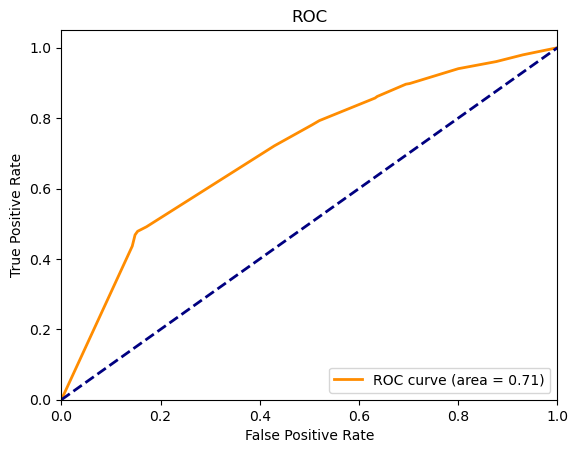

In [82]:
y_scores = model.predict_proba(X_test)[:, 1] 
 
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Selecting columns to use

In [83]:
df.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [84]:
X1 = df[['age', 'marital', 'education', 'balance', 'housing', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success']]
y1 = df[['y']]

In [85]:
y1= pd.DataFrame(y).reset_index(drop=True)

In [86]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [87]:
X1_train = pd.DataFrame(X1_train).reset_index(drop=True)
X1_test = pd.DataFrame(X1_test).reset_index(drop=True)
y1_train2 = y1_train.reset_index(drop=True)
y1_test2 = y1_test.reset_index(drop=True)
train = pd.concat([X1_train, y1_train], axis=1)
test = pd.concat([X1_test, y1_test2], axis=1)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [88]:
y1_pred=model.predict(X1_test)

conf = confusion_matrix(y1_test, y1_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [89]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8901913081941834
Precision: 0.7024793388429752
Recall: 0.15582034830430797
Confusion Matrix:
      0    1
0  7880   72
1   921  170


In [90]:
sm = SMOTE(random_state=42)
X1_train_res, y1_train_res = sm.fit_resample(X1_train, y1_train)

In [91]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X1_train_res, y1_train_res)

y1_pred=model.predict(X1_test)

conf = confusion_matrix(y1_test, y1_pred)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

accuracy = accuracy_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [92]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7197832577684397
Precision: 0.20610997963340122
Recall: 0.46379468377635197
Confusion Matrix:
      0     1
0  6003  1949
1   585   506


In [93]:
classification_selected = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
classification_selected = pd.DataFrame.from_dict(classification_selected)
classification_selected

,0,1,accuracy,macro avg,weighted avg
precision,0.922302,0.282105,0.787792,0.602203,0.845065
recall,0.828471,0.491292,0.787792,0.659882,0.787792
f1-score,0.872872,0.358409,0.787792,0.615640,0.810804
support,7952.000000,1091.000000,0.787792,9043.000000,9043.000000


In [94]:
most_informative_features = pd.DataFrame([model.feature_importances_], columns=X1_train.columns)
most_informative_features

,age,marital,education,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,poutcome_failure,poutcome_success
0,0.004412,0.0,0.001356,0.00911,0.571324,0.165874,0.0,0.132365,0.0,0.0,...,0.0,0.0,0.0,0.0,0.106892,0.0,0.0,0.0,0.0,0.008667


# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_4420\221765188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [97]:
y2_pred = rfc.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y2_pred)
recall = recall_score(y_test, y2_pred)
precision = precision_score(y_test, y2_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [99]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.891850049762247
Precision: 0.6416040100250626
Recall: 0.23464711274060496
Confusion Matrix:
      0     1
0  6003  1949
1   585   506


In [100]:
classification_rf = classification_report(y_test, y2_pred, target_names=['0', '1'], output_dict=True)
classification_rf = pd.DataFrame.from_dict(classification_rf)
classification_rf

,0,1,accuracy,macro avg,weighted avg
precision,0.903401,0.641604,0.89185,0.772503,0.871816
recall,0.982017,0.234647,0.89185,0.608332,0.891850
f1-score,0.941070,0.343624,0.89185,0.642347,0.868991
support,7952.000000,1091.000000,0.89185,9043.000000,9043.000000


In [101]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [102]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BA813FF890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BA8136C6D0>})

In [103]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 301}


In [110]:
rfc1 = RandomForestClassifier(random_state=42, max_depth=12, n_estimators=301)
rfc1.fit(X_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_4420\3024351997.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, n_estimators=301, random_state=42)

In [111]:
y3_pred = rfc.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y3_pred)
recall = recall_score(y_test, y3_pred)
precision = precision_score(y_test, y3_pred)
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [116]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.891850049762247
Precision: 0.6416040100250626
Recall: 0.23464711274060496
Confusion Matrix:
      0     1
0  6003  1949
1   585   506


In [117]:
print(classification_report(y_test,
                            y3_pred,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.64      0.23      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



In [118]:
classification_ = classification_report(y_test, y3_pred, target_names=['0', '1'], output_dict=True)
classification_sm = pd.DataFrame.from_dict(classification_sm)
classification_sm

,0,1,accuracy,macro avg,weighted avg
precision,0.925905,0.306799,0.802057,0.616352,0.851213
recall,0.842304,0.508708,0.802057,0.675506,0.802057
f1-score,0.882128,0.382759,0.802057,0.632443,0.821881
support,7952.000000,1091.000000,0.802057,9043.000000,9043.000000


# Notes

## Initial Decision Tree

* Accuracy: 0.8904124737365918
* 
Precision: 0.678571428571428
* 
Recall: 0.174152153987167
* 4
Confusion Matrix:
      0    1
0  7862   90
1   90

## SMOTE with a depth of 4

* Accuracy: 0.802056839544399
* Precision: 0.3067993366500829
* Recall: 0.5087076076993584
* Confusion Matrix:
      0     1
0  6698  1254
1   536   555

## SMOTE with a depth of 2

* Accuracy: 0.6545394227579343
* Precision: 0.19428571428571428
* Recall: 0.5921173235563703
* Confusion Matrix:
      0     1
0  5273  2679
1   445   646

# Random Oversampling

* Accuracy: 0.7475395333407056
* Precision: 0.25573770491803277
* Recall: 0.5719523373052245
* Confusion Matrix:
      0     1
0  6136  1816
1   467   624

# ADASYN

* Accuracy: 0.8036049983412584
* Precision: 0.2986478542034098
* Recall: 0.46562786434463793
* Confusion Matrix:
      0     1
0  6759  1193
1   583   508

# BorderlineSMOTE

* Accuracy: 0.8051531571381179
* Precision: 0.30183106910809215
* Recall: 0.46837763519706693
* Confusion Matrix:
      0     1
0  6770  1182
1   580   511

# SMOTEENN

* Accuracy: 0.7877916620590512
* Precision: 0.28210526315789475
* Recall: 0.4912923923006416
* Confusion Matrix:
      0     1
0  6588  1364
1   555   536

# Specifying Columns

* Accuracy: 0.8901913081941834
* Precision: 0.7024793388429752
* Recall: 0.15582034830430797
* Confusion Matrix:
      0    1
0  7880   72
1   921  170

# Specifying Columns SMOTE

* Accuracy: 0.7197832577684397
* Precision: 0.20610997963340122
* Recall: 0.46379468377635197
* Confusion Matrix:
      0     1
0  6003  1949
1   585   506

# Random Forest

* Accuracy: 0.891850049762247
* 
Precision: 0.641604010025062
* 
Recall: 0.234647112740604
* 6
Confusion Matrix:
      0     1
0  6003  1949
1   585

# Random Forest
## using a generator for the optimum parameters (max depth = 12, n_estimators = 301)

* Accuracy: 0.891850049762247
* 
Precision: 0.641604010025062
* 
Recall: 0.234647112740604
* 6
Confusion Matrix:
      0     1
0  6003  1949
1   585

# Naive Bayes - 1st model

* Accuracy: 0.816874930885768
* 
Precision: 0.3031358885017421
* 
Recall: 0.39871677360219
* 8
Confusion Matrix:
      0     1
0  6952  1000
1   656

# Naive Bayes - 2nd model

* Accuracy: 0.834347008736039
* 
Precision: 0.3565891472868217
* 
Recall: 0.463794683776351
* Confusion Matrix:
      0    1
0  7039  913
1   585  

# Deep Learning Model

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.2986
* 
Test Loss: 0.293192565441131
*  Test Accuracy: 0.89196062088012

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st
* p
Accuracy: 0.891960620880
* 7, Precision: 0.7723908329599
* 1, Recall: 0.60958123857720150697   435   506   5061  190